# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [75]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [76]:
np_vector = df.values.transpose()
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.06417    0.33     ]
 [ 0.16602   -0.0084448  0.33     ]
 [ 0.50408    0.098609   0.5      ]
 [-0.63563    0.97851    0.       ]
 [-0.63486    0.92308    0.       ]]


input 1
min:-0.999560, max:0.997750, median:-0.036787, mean:-0.033911, std:0.581712


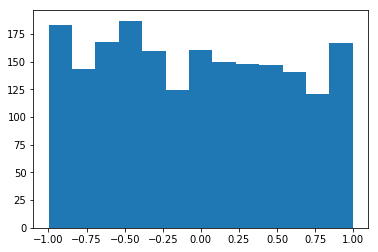

input 2
min:-0.999790, max:0.999340, median:-0.008641, mean:-0.007416, std:0.577141


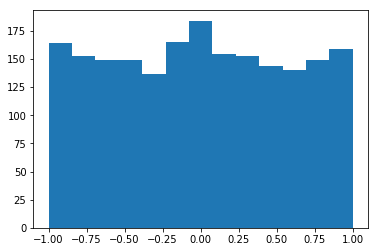

output
min:-0.500000, max:0.830000, median:0.000000, mean:0.034030, std:0.265202


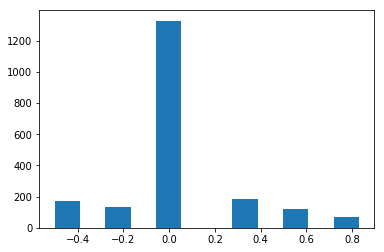

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np_vector[:, 0]
y = np_vector[:, 1]
tk = np_vector[:,2]

def explore_vector(vector, message=None):
    assert type(vector) is np.ndarray
    assert vector.ndim == 1
    if message is not None:
        print(message)
    print('min:%f, max:%f, median:%f, mean:%f, std:%f' 
          % (np.min(vector), np.max(vector), np.median(vector), np.mean(vector), np.std(vector)))
    plt.hist(vector, bins='auto')
    plt.show()

explore_vector(x, "input 1")
explore_vector(y, "input 2")
explore_vector(tk, "output")

## Data Preparation

In [78]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[ 0.27937    0.043309   0.83     ]
 [ 0.63061    0.94875    0.       ]
 [ 0.23547   -0.99245    0.       ]
 [-0.10899    0.064879   0.33     ]
 [-0.0037695 -0.0033385  0.33     ]]


In [79]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[ 0.27937    0.043309 ]
 [ 0.63061    0.94875  ]
 [ 0.23547   -0.99245  ]
 [-0.10899    0.064879 ]
 [-0.0037695 -0.0033385]]
output shape:(2000,)
[0.83 0.   0.   0.33 0.33]


In [80]:
pct_training = 0.9
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1620, Validation Size: 180, Test Size: 200
train_in shape:(1620, 2)


# Model Construction

In [92]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1))

model.summary()

# custom metrics
import keras.backend as K

def max_diff(y_true, y_pred):
    return K.max(K.abs(y_pred-y_true))

def min_diff(y_true, y_pred):
    return K.min(K.abs(y_pred-y_true))

# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=[max_diff, min_diff])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_69 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_70 (Dense)             (None, 16)                272       
__________

In [95]:
history = model.fit(train_in,
                    train_out,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1620 samples, validate on 180 samples
Epoch 1/100
1620/1620 [==============================] - 0s 211us/step - loss: 0.0050 - max_diff: 0.2489 - min_diff: 0.0010 - val_loss: 0.0062 - val_max_diff: 0.2554 - val_min_diff: 0.0022
Epoch 2/100
1620/1620 [==============================] - 0s 210us/step - loss: 0.0052 - max_diff: 0.2627 - min_diff: 0.0012 - val_loss: 0.0088 - val_max_diff: 0.3415 - val_min_diff: 0.0053
Epoch 3/100
1620/1620 [==============================] - 0s 212us/step - loss: 0.0051 - max_diff: 0.2578 - min_diff: 0.0010 - val_loss: 0.0055 - val_max_diff: 0.2631 - val_min_diff: 0.0019
Epoch 4/100
1620/1620 [==============================] - 0s 202us/step - loss: 0.0049 - max_diff: 0.2472 - min_diff: 9.2918e-04 - val_loss: 0.0063 - val_max_diff: 0.2527 - val_min_diff: 6.5523e-04
Epoch 5/100
1620/1620 [==============================] - 0s 184us/step - loss: 0.0046 - max_diff: 0.2483 - min_diff: 0.0010 - val_loss: 0.0072 - val_max_diff: 0.2934 - val_min_diff: 4.4345e

1620/1620 [==============================] - 0s 212us/step - loss: 0.0035 - max_diff: 0.2288 - min_diff: 0.0013 - val_loss: 0.0076 - val_max_diff: 0.3345 - val_min_diff: 0.0011
Epoch 44/100
1620/1620 [==============================] - 0s 218us/step - loss: 0.0036 - max_diff: 0.2223 - min_diff: 9.2278e-04 - val_loss: 0.0073 - val_max_diff: 0.2470 - val_min_diff: 0.0011
Epoch 45/100
1620/1620 [==============================] - 0s 178us/step - loss: 0.0040 - max_diff: 0.2396 - min_diff: 8.9951e-04 - val_loss: 0.0037 - val_max_diff: 0.2040 - val_min_diff: 8.9553e-04
Epoch 46/100
1620/1620 [==============================] - 0s 209us/step - loss: 0.0041 - max_diff: 0.2447 - min_diff: 9.5586e-04 - val_loss: 0.0059 - val_max_diff: 0.2985 - val_min_diff: 0.0011
Epoch 47/100
1620/1620 [==============================] - 0s 213us/step - loss: 0.0038 - max_diff: 0.2304 - min_diff: 8.5591e-04 - val_loss: 0.0075 - val_max_diff: 0.2931 - val_min_diff: 3.7273e-04
Epoch 48/100
1620/1620 [===============

Epoch 85/100
1620/1620 [==============================] - 0s 201us/step - loss: 0.0033 - max_diff: 0.2288 - min_diff: 6.9626e-04 - val_loss: 0.0083 - val_max_diff: 0.3464 - val_min_diff: 2.0969e-04
Epoch 86/100
1620/1620 [==============================] - 0s 226us/step - loss: 0.0034 - max_diff: 0.2289 - min_diff: 6.4156e-04 - val_loss: 0.0071 - val_max_diff: 0.3010 - val_min_diff: 1.9970e-04
Epoch 87/100
1620/1620 [==============================] - 0s 201us/step - loss: 0.0034 - max_diff: 0.2176 - min_diff: 0.0012 - val_loss: 0.0048 - val_max_diff: 0.2291 - val_min_diff: 9.2638e-05
Epoch 88/100
1620/1620 [==============================] - 0s 227us/step - loss: 0.0029 - max_diff: 0.2085 - min_diff: 7.8815e-04 - val_loss: 0.0065 - val_max_diff: 0.2881 - val_min_diff: 0.0029
Epoch 89/100
1620/1620 [==============================] - 0s 219us/step - loss: 0.0037 - max_diff: 0.2384 - min_diff: 0.0013 - val_loss: 0.0047 - val_max_diff: 0.2818 - val_min_diff: 1.0700e-04
Epoch 90/100
1620/1620

In [96]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_max_diff', 'val_min_diff', 'loss', 'max_diff', 'min_diff'])

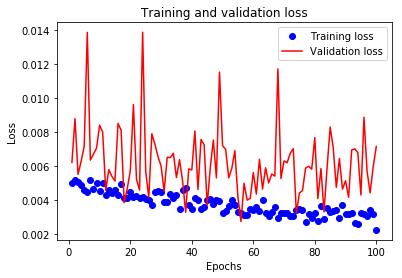

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

max_diff = history.history['max_diff']
val_max_diff = history.history['val_max_diff']

min_diff = history.history['min_diff']
val_min_diff = history.history['val_min_diff']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

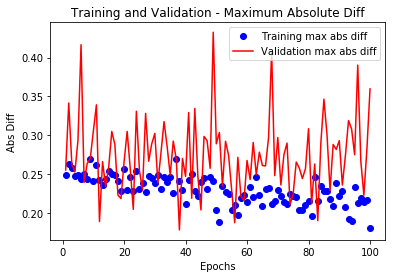

In [109]:
plt.clf()   # clear figure
plt.plot(epochs, max_diff, 'bo', label='Training max abs diff')
plt.plot(epochs, val_max_diff, 'r', label='Validation max abs diff')
plt.title('Training and Validation - Maximum Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs Diff')
plt.legend()

plt.show()

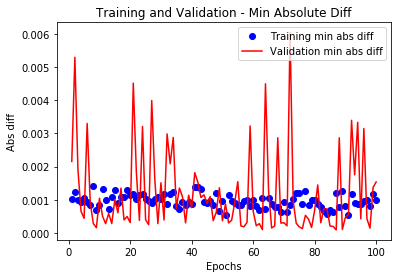

In [110]:
plt.clf()   # clear figure
plt.plot(epochs, min_diff, 'bo', label='Training min abs diff')
plt.plot(epochs, val_min_diff, 'r', label='Validation min abs diff')
plt.title('Training and Validation - Min Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs diff')
plt.legend()

plt.show()

## Model Evaluation

In [103]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

200/200 [==============================] - 0s 120us/step


[0.005387756321579218, 0.2978870379924774, 0.0004883942008018494]

In [104]:
pre_test_out = model.predict(test_in)

Predicted Test Data Output
min:-0.502794, max:0.876299, median:0.007661, mean:0.051982, std:0.271170


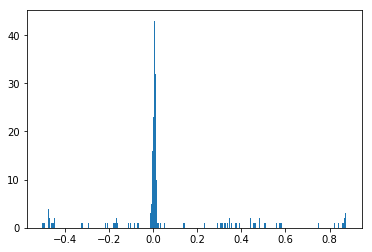

In [105]:
explore_vector(pre_test_out.flatten(), message='Predicted Test Data Output')

Test Data Output
min:-0.500000, max:0.830000, median:0.000000, mean:0.040300, std:0.273038


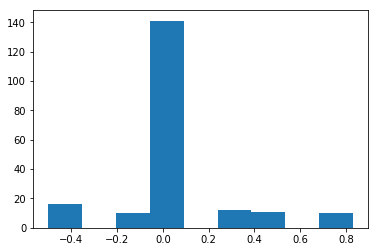

In [106]:
explore_vector(test_out, message='Test Data Output')

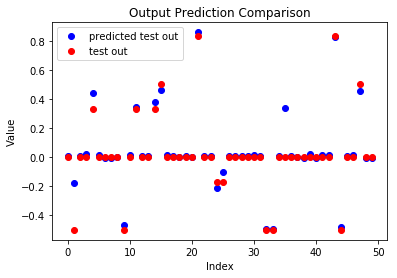

In [113]:
plt.clf()   # clear figure
NUM_PLOT = 50
plt.plot(pre_test_out[:NUM_PLOT], 'bo', label='predicted test out')
plt.plot(test_out[:NUM_PLOT], 'ro', label='test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()